In [ ]:

# install pytorch and huggingface transformers if you havn't done so
!pip install torch==1.5.1
!pip install transformers==3.0.1

ERROR: Could not find a version that satisfies the requirement torch==1.5.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==1.5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 19.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed buil

In [ ]:
!pip install bert_score==0.3.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
from bert_score import score

In [ ]:
import pandas as pd
few_shot = '/content/extracted_relations_few_shot.csv'
zero_shot = '/content/extracted_relations_zero_shot.csv'
df_few_shot = pd.read_csv(few_shot)
df_zero_shot = pd.read_csv(zero_shot)

In [ ]:
df_zero_shot.head()

PMC                                           PMCtitle  \
0  PMC11050415                 Anti-Atherosclerotic Properties of   
1  PMC10143525  Novel 2-Amino-1,4-Naphthoquinone Derivatives I...   
2  PMC10210024  Synthesis, In Silico Studies, and In Vitro Ant...   
3  PMC10456557  Effects of Pera Orange Juice and Moro Orange J...   
4  PMC10505742  Untargeted plasma metabolome identifies biomar...   

                                         PMCabstract Query_Protein Query_Drug  \
0         The high content of bioactive compounds in        P05362        PCA   
1  A series of 1,4-naphthoquinone derivatives con...        P00533         XA   
2                            A series of eight novel        P28482         XA   
3  Cardiovascular disease is a leading cause of d...        P16035        PCA   
4                                                NaN        P00533         XA   

                                        ProteinNames DrugNames  \
0  ['ICAM1', 'intercellular adhesion molecule 1',...   ['PCA']   
1  ['Epidermal growth factor receptor', 'EGFR', '...    ['XA']   
2                               ['p38', 'ERK', 'RK']    ['XA']   
3                                         ['TIMP-2']   ['PCA']   
4                                          ['Genes']    ['XA']   

  FuzzyMatchProtein FuzzyMatchDrug  \
0                []             []   
1                []             []   
2           ['p38']             []   
3                []             []   
4                []             []   

                                   ExactMatchProtein  ...        CID  \
0  ['ICAM1', 'intercellular adhesion molecule 1',...  ...  135403803   
1  ['Epidermal growth factor receptor', 'EGFR', '...  ...  135403800   
2                               ['p38', 'ERK', 'RK']  ...  135403800   
3                                         ['TIMP-2']  ...  135403803   
4                                          ['Genes']  ...  135403800   

                          chain_of_thought_reasoning  \
0  The document discusses the anti-atheroscleroti...   
1  The document discusses the effects of a novel ...   
2  The document discusses the synthesis and evalu...   
3  The document discusses the effects of Pera and...   
4  The document discusses the metabolic profiling...   

                                                drug  \
0                        Aronia melanocarpa extracts   
1  2-amino-1,4-naphthoquinone derivative (compoun...   
2                                                AA6   
3                                  Pera Orange Juice   
4                                           Caffeine   

                                   protein  \
0                                   ICAM-1   
1                                     EGFR   
2                           p38 MAP kinase   
3                                   TIMP-2   
4  Epidermal Growth Factor Receptor (EGFR)   

                                              effect  \
0  The extracts suppressed the surface expression...   
1  Compound 5i induced autophagy by promoting the...   
2  AA6 showed significant inhibitory activity aga...   
3  The ingestion of Pera orange juice did not sig...   
4  The document does not provide direct evidence ...   

                                  targeted_sentences interaction_type  \
0  ['As inflammation and cell adhesion molecules ...   Downregulation   
1  ['Surprisingly, in the following preliminary b...     Upregulation   
2  ['The compound AA6 possesses considerable p38 ...   Downregulation   
3  ['Protein expression of type I collagen, TIMP-...          Neutral   
4  ['The positive ion mode showed an enrichment o...          Neutral   

                                             context  \
0        Prevention and treatment of atherosclerosis   
1  Cancer treatment, specifically targeting non-s...   
2  Development of anti-inflammatory drugs targeti...   
3  Cardiovascular health, specifically focusing o...   
4  Treatment of extracranial arteriovenous 

In [ ]:
candidates_few_shot = []
references_few_shot = []
candidates_zero_shot = []
references_zero_shot = []

for index, row in df_few_shot.iterrows():
  candidates = row['effect']
  references = ' '.join(eval(row['targeted_sentences']))
  if len(eval(row['targeted_sentences'])) == 0:
    continue
  candidates_few_shot.append(candidates)
  references_few_shot.append(references)

for index, row in df_zero_shot.iterrows():
  candidates = row['effect']
  references = ' '.join(eval(row['targeted_sentences']))
  if len(eval(row['targeted_sentences'])) == 0:
    continue
  candidates_zero_shot.append(candidates)
  references_zero_shot.append(references)

In [ ]:
# P, R, F1 = score(candidates, references, lang="en", verbose=True)
P_few_shot, R_few_shot, F1_few_shot = score(candidates_few_shot, references_few_shot, lang="en", verbose=True)
P_zero_shot, R_zero_shot, F1_zero_shot = score(candidates_zero_shot, references_zero_shot, lang="en", verbose=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-larg

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.03 seconds, 6.61 sentences/sec


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.15 seconds, 17.43 sentences/sec


In [ ]:
print(f"Zero-shot F1 score: {' '.join(map(str, F1_zero_shot))}")
print(f"Zero-shot R score: {' '.join(map(str, R_zero_shot))}")
print(f"Zero-shot P score: {' '.join(map(str, P_zero_shot))}")
print(f"Few-shot F1 score: {' '.join(map(str, F1_few_shot))}")
print(f"Few-shot R score: {' '.join(map(str, R_few_shot))}")
print(f"Few-shot P score: {' '.join(map(str, P_few_shot))}")

Zero-shot F1 score: tensor(0.8770) tensor(0.9293) tensor(0.8905) tensor(0.8876) tensor(0.8491) tensor(0.8800) tensor(0.9222) tensor(0.9019) tensor(0.8825) tensor(0.8502) tensor(0.9365) tensor(0.8651) tensor(0.9115) tensor(0.8975) tensor(0.8136) tensor(0.8915) tensor(0.9008) tensor(0.8782) tensor(0.8714) tensor(0.8777)
Zero-shot R score: tensor(0.8279) tensor(0.9030) tensor(0.8594) tensor(0.8884) tensor(0.8227) tensor(0.8710) tensor(0.8914) tensor(0.8741) tensor(0.8340) tensor(0.8188) tensor(0.9484) tensor(0.8493) tensor(0.8643) tensor(0.8912) tensor(0.7705) tensor(0.8714) tensor(0.8717) tensor(0.8456) tensor(0.8294) tensor(0.8365)
Zero-shot P score: tensor(0.9324) tensor(0.9572) tensor(0.9239) tensor(0.8867) tensor(0.8773) tensor(0.8891) tensor(0.9551) tensor(0.9314) tensor(0.9369) tensor(0.8841) tensor(0.9249) tensor(0.8815) tensor(0.9643) tensor(0.9038) tensor(0.8617) tensor(0.9126) tensor(0.9320) tensor(0.9135) tensor(0.9180) tensor(0.9232)
Few-shot F1 score: tensor(0.8831) tensor(0

In [ ]:
# print(f"System level F1 score: {F1.mean():.3f}")
print(f"Zero-shot F1 score: {F1_zero_shot.mean():.3f}")
print(f"Zero-shot R score: {R_zero_shot.mean():.3f}")
print(f"Zero-shot P score: {P_zero_shot.mean():.3f}")
print(f"Few-shot F1 score: {F1_few_shot.mean():.3f}")
print(f"Few-shot R score: {R_few_shot.mean():.3f}")
print(f"Few-shot P score: {P_few_shot.mean():.3f}")

Zero-shot F1 score: 0.886
Zero-shot R score: 0.858
Zero-shot P score: 0.915
Few-shot F1 score: 0.895
Few-shot R score: 0.874
Few-shot P score: 0.919


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# clear plots
plt.clf()

<Figure size 640x480 with 0 Axes>

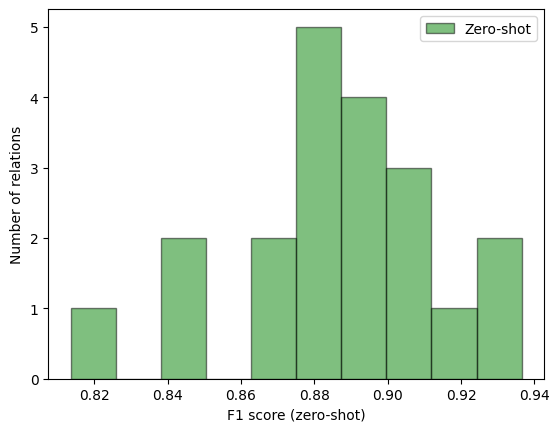

<Figure size 640x480 with 0 Axes>

In [ ]:
# get bins
bins = plt.hist(F1_zero_shot, bins=10)[1]
plt.clf()
plt.hist(F1_zero_shot, bins=bins, alpha=0.5, label="Zero-shot", color="green", edgecolor="black")
plt.xlabel("F1 score (zero-shot)")
plt.ylabel("Number of relations")
plt.legend(loc="upper right")
plt.show()
plt.clf()

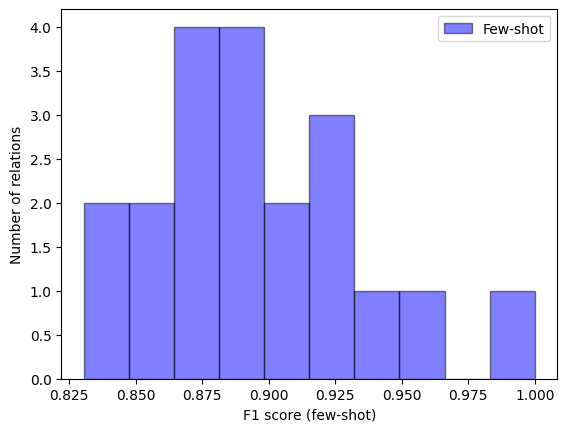

<Figure size 640x480 with 0 Axes>

In [ ]:
# get bins
bins = plt.hist(F1_few_shot, bins=10)[1]
plt.clf()
plt.hist(F1_few_shot, bins=bins, alpha=0.5, label="Few-shot", color="blue", edgecolor="black")
plt.xlabel("F1 score (few-shot)")
plt.ylabel("Number of relations")
plt.legend(loc="upper right")
plt.show()
plt.clf()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


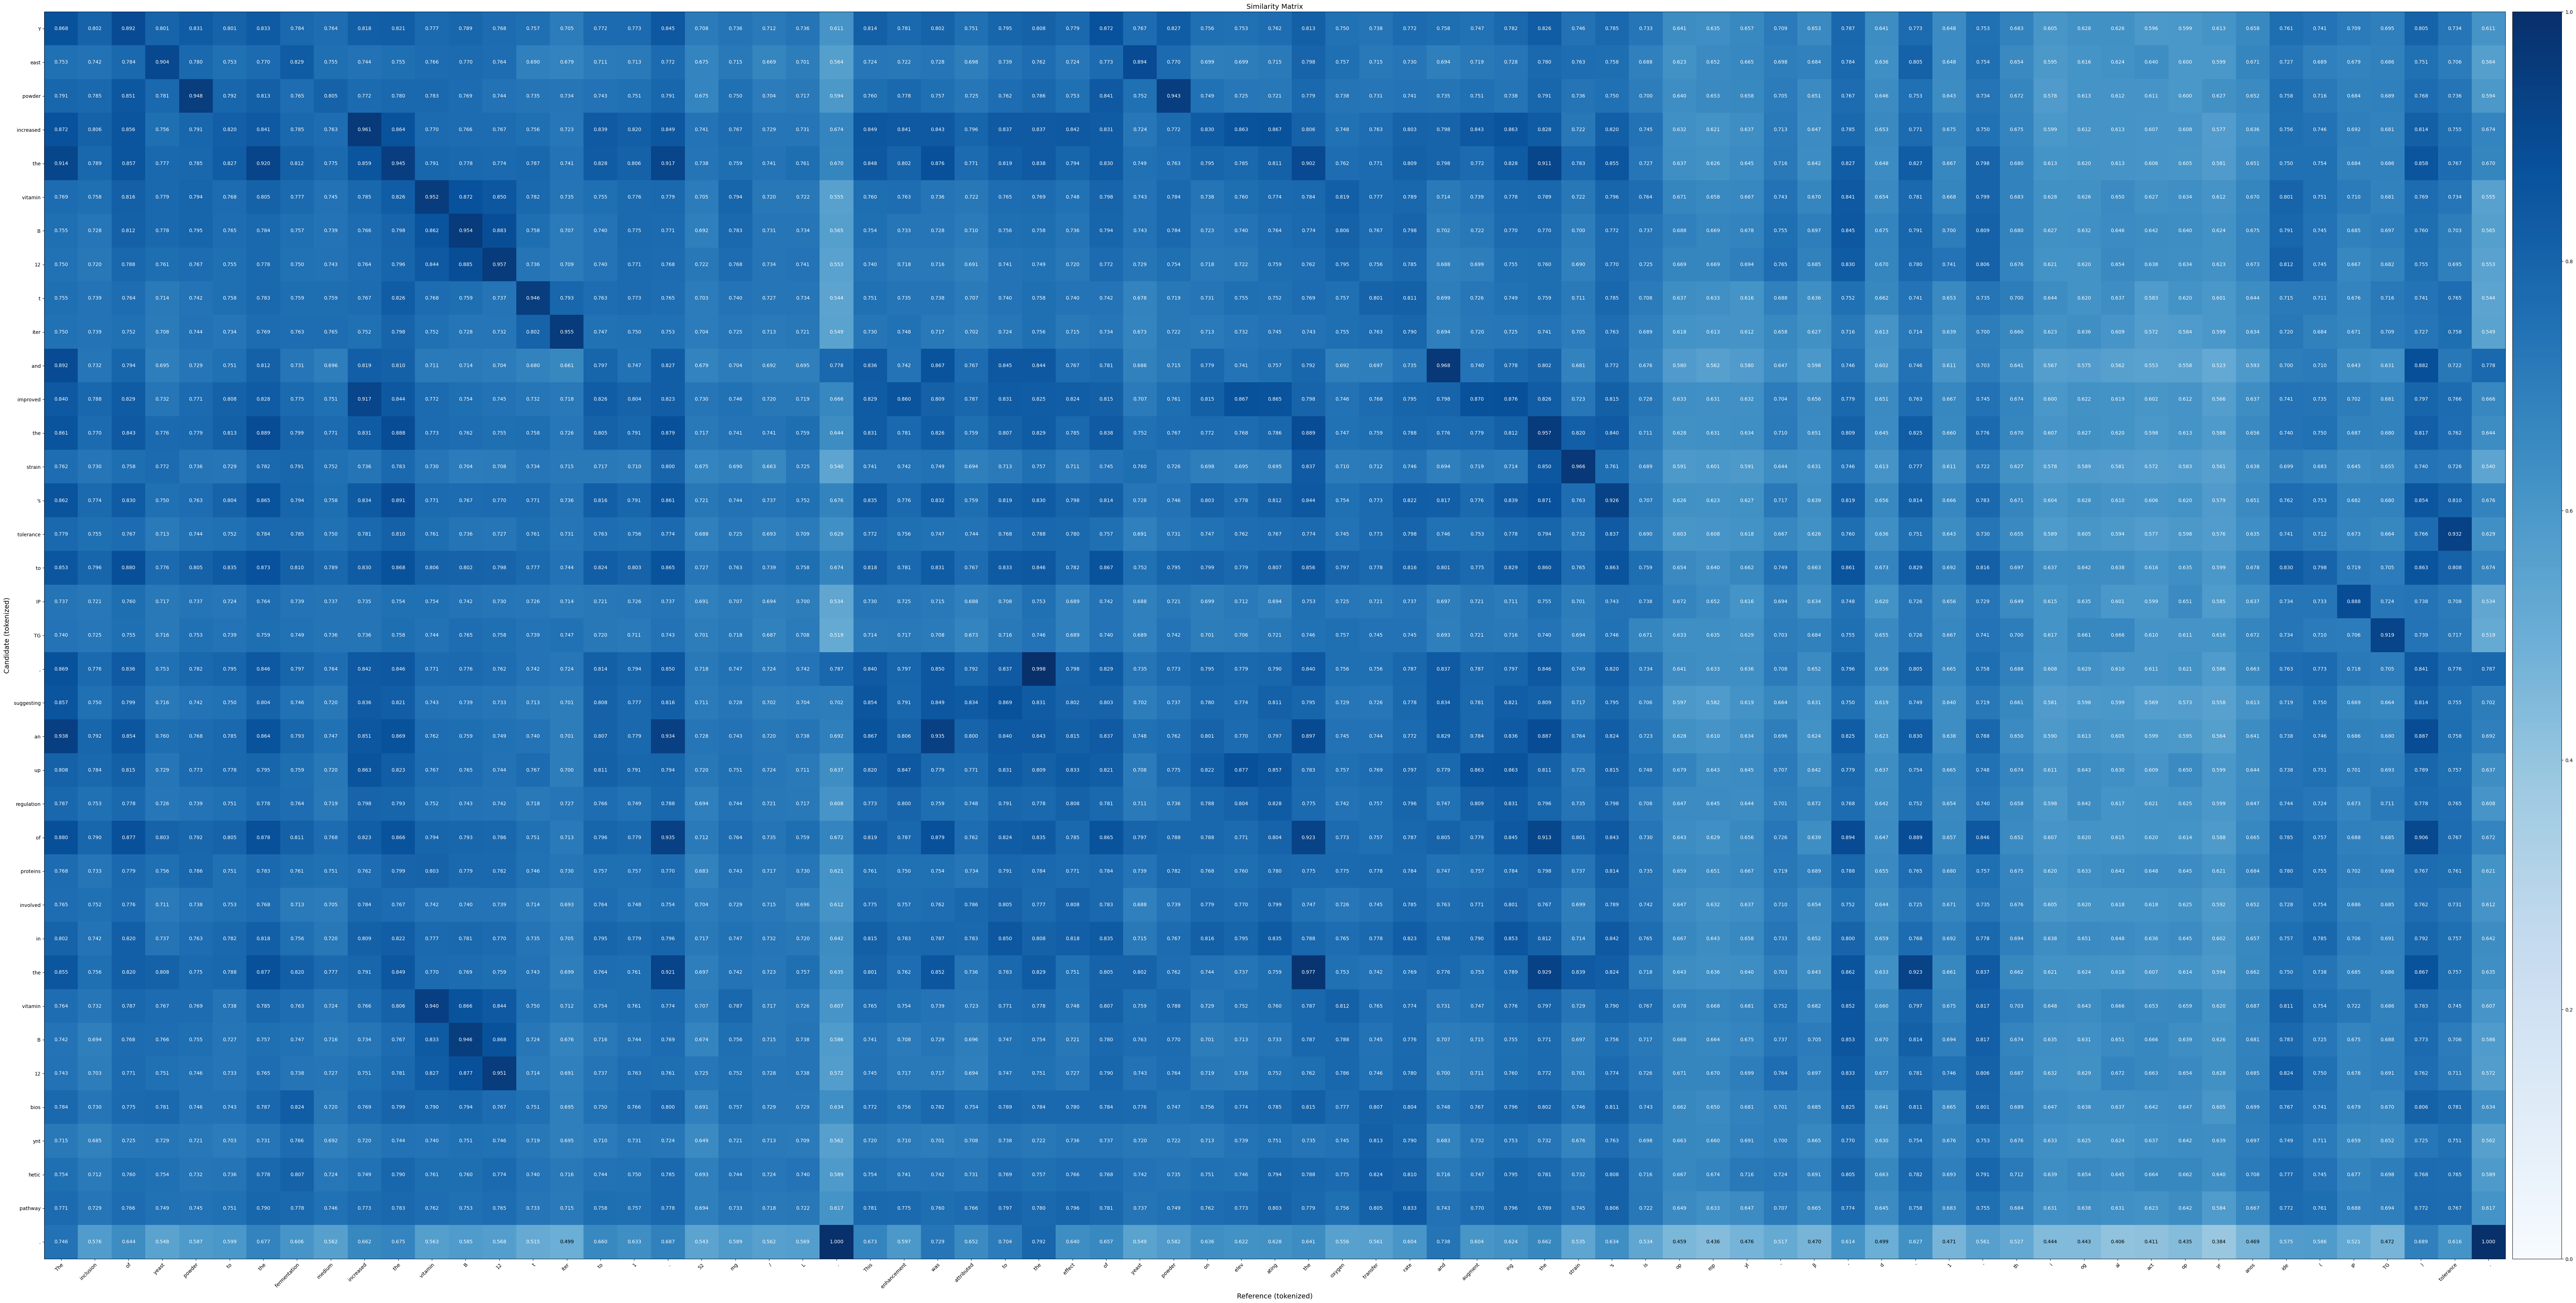

In [ ]:
from bert_score import plot_example

cand = candidates_zero_shot[17]
ref = references_zero_shot[17]
plot_example(cand, ref, lang="en")

The inclusion of yeast powder in the fermentation medium increases the vitamin B12 titer by elevating the oxygen transfer rate and augmenting the strain's isopropyl-β-d-1-thiogalactopyranoside (IPTG) tolerance, thereby enhancing the overall metabolic activity of the engineered E. coli strain. The inclusion of yeast powder to the fermentation medium increased the vitamin B12 titer to 1.52 mg/L. This enhancement was attributed to the effect of yeast powder on elevating the oxygen transfer rate and augmenting the strain's isopropyl-β-d-1-thiogalactopyranoside (IPTG) tolerance.


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


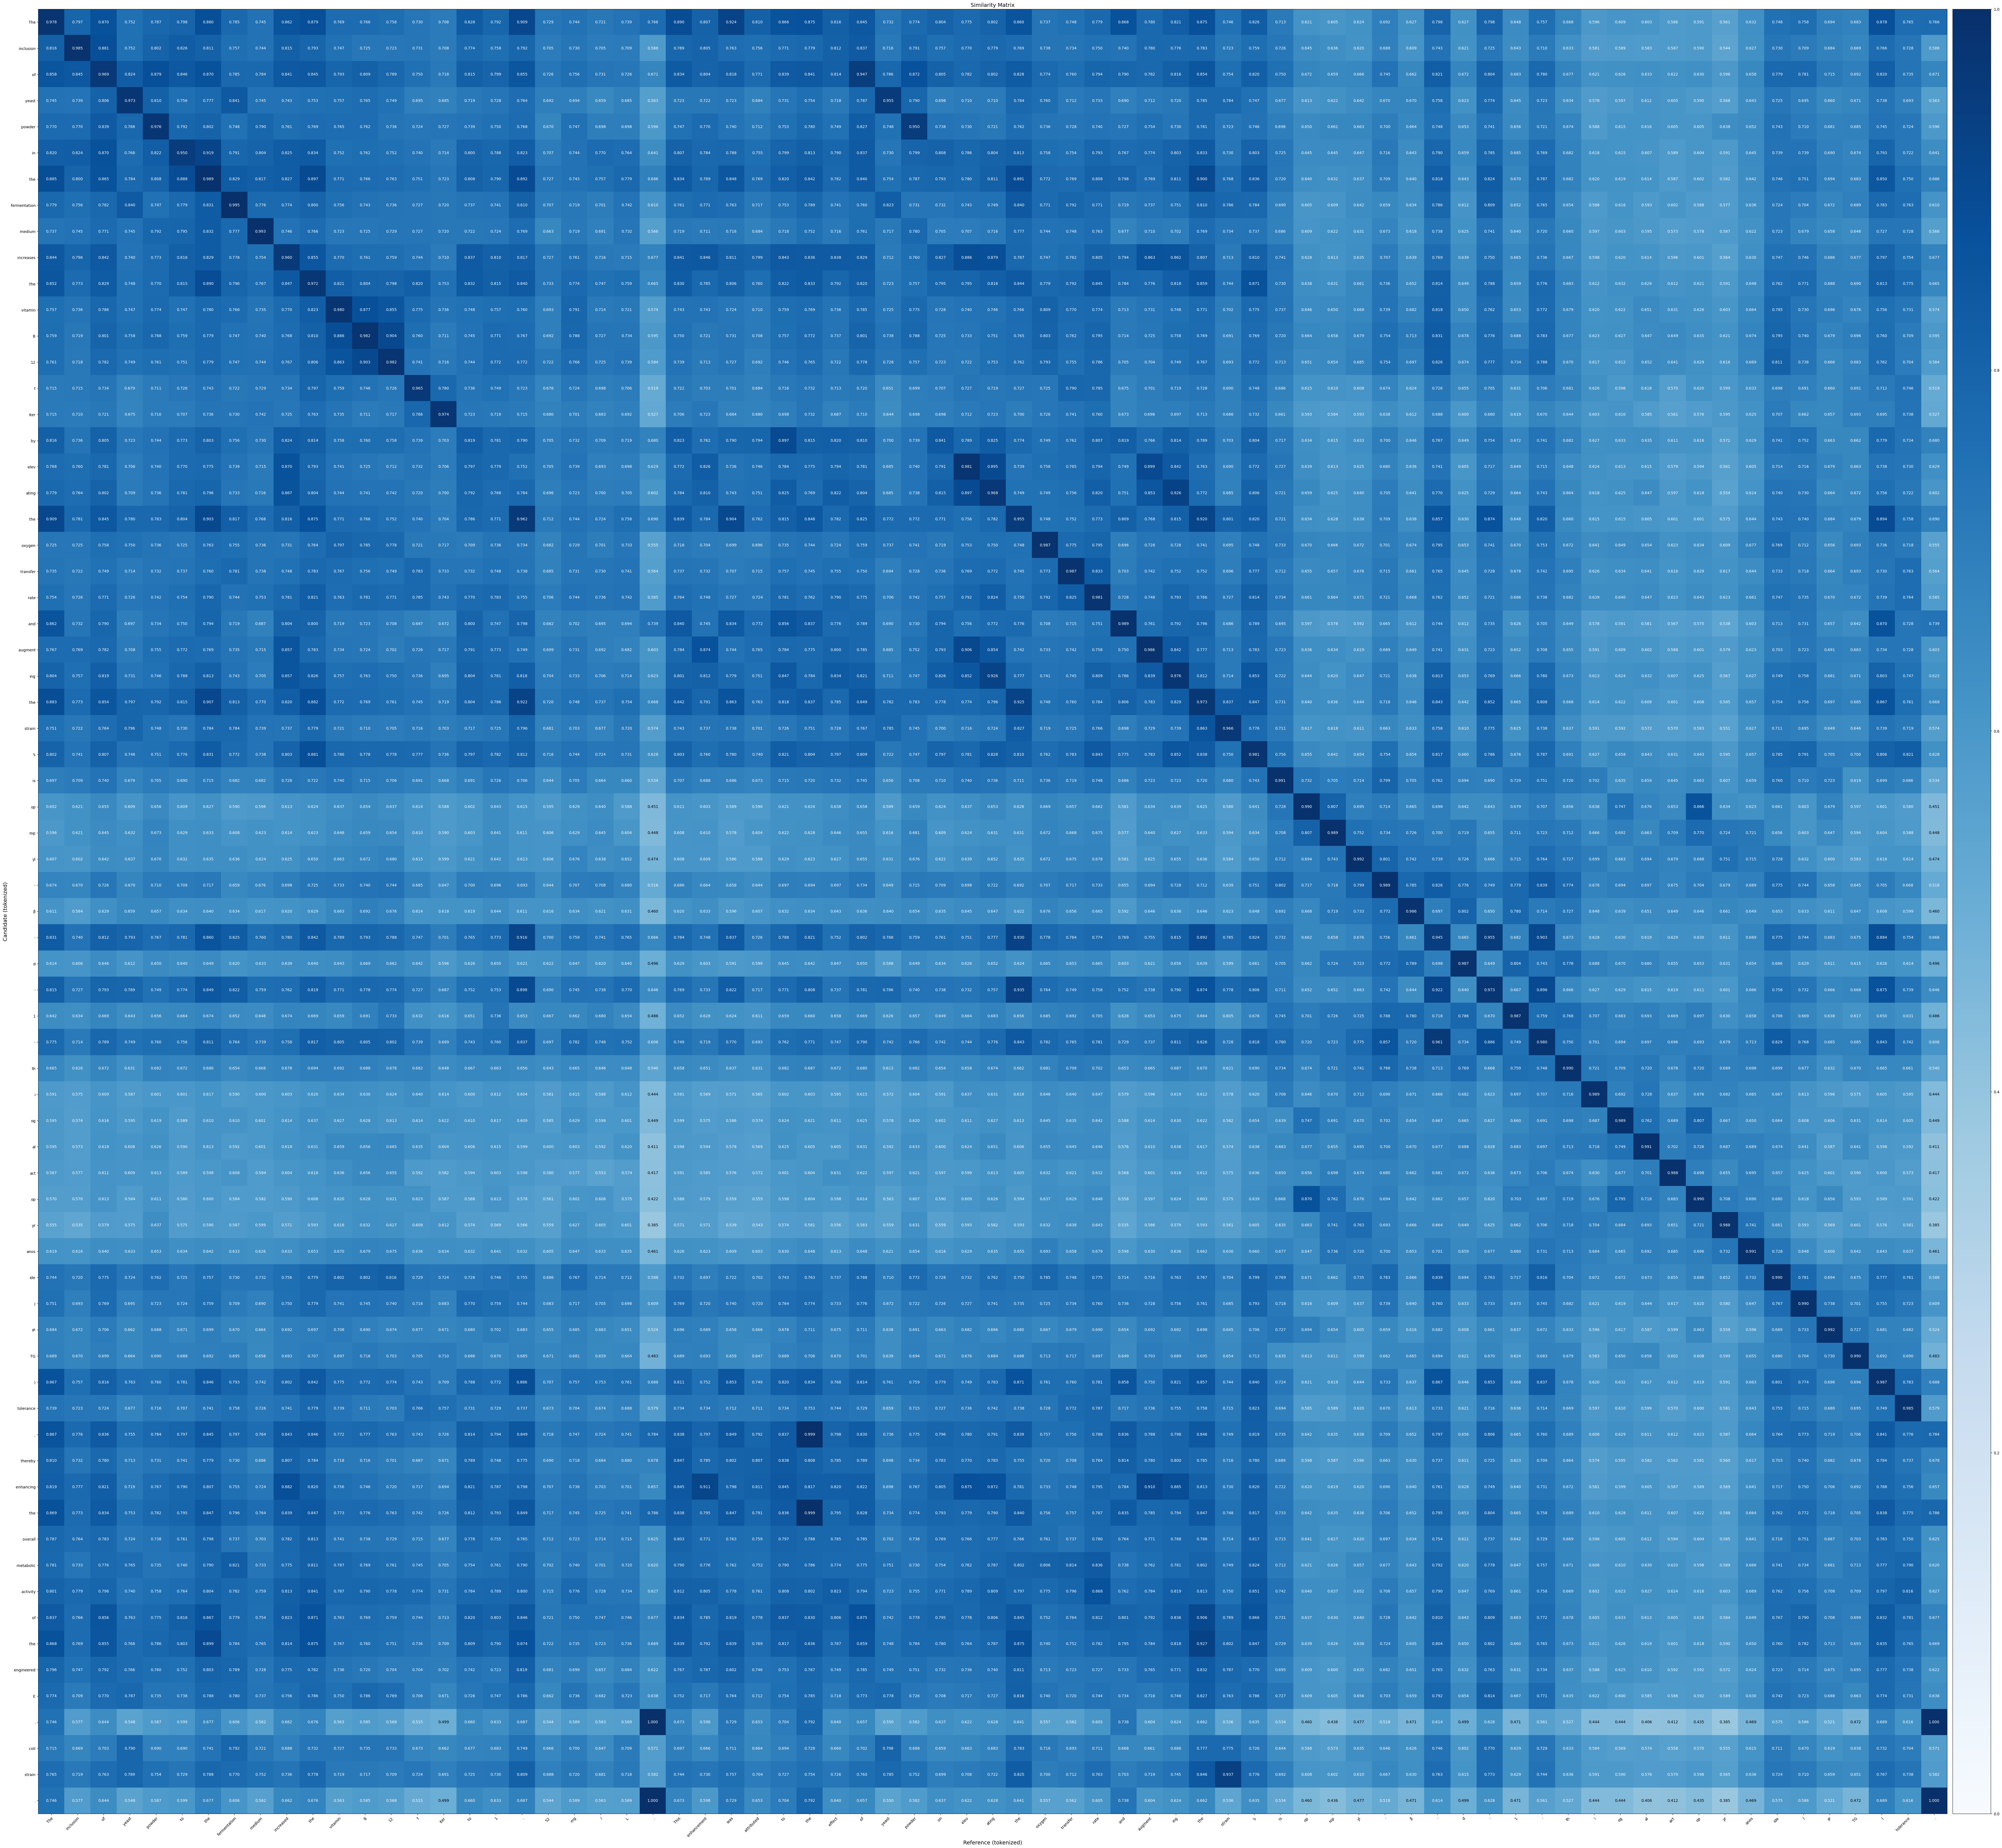

In [ ]:
from bert_score import plot_example

cand = candidates_few_shot[17]
ref = references_few_shot[17]
print(cand, ref)
plot_example(cand, ref, lang="en")

In [ ]:
for idx in range(len(candidates_few_shot)):
  cand = candidates_zero_shot[idx]
  ref = references_zero_shot[idx]
  print(idx, '|', len(cand)/len(ref), "\n -- -- \n")

0 | 0.17088607594936708 
 -- -- 

1 | 0.3200883002207506 
 -- -- 

2 | 0.3 
 -- -- 

3 | 1.0980392156862746 
 -- -- 

4 | 0.4279411764705882 
 -- -- 

5 | 0.550314465408805 
 -- -- 

6 | 0.2921686746987952 
 -- -- 

7 | 0.3716475095785441 
 -- -- 

8 | 0.4222222222222222 
 -- -- 

9 | 0.2983425414364641 
 -- -- 

10 | 1.4195402298850575 
 -- -- 

11 | 0.27365728900255754 
 -- -- 

12 | 0.45864661654135336 
 -- -- 

13 | 0.5457063711911357 
 -- -- 

14 | 0.17604617604617603 
 -- -- 

15 | 0.5259515570934256 
 -- -- 

16 | 0.273224043715847 
 -- -- 

17 | 0.6223776223776224 
 -- -- 

18 | 0.185 
 -- -- 

19 | 0.13651137594799567 
 -- -- 

